# Class 17: Introduction to Statistical Inference

Plan for today:
- Review for loops and writing functions
- Introduction to statistical inference
- Introduction to hypothesis tests


In [1]:
import YData

# YData.download.download_class_code(17)   # get class code    
# YData.download.download_class_code(17, TRUE) # get the code with the answers 

# YData.download.download_class_file('project_template.ipynb', 'homework')  # downloads the class project template 
# YData.download_homework(7)  # downloads the 7th homework 

YData.download_data("movies.csv")
YData.download_data("daily_bike_totals.csv")

The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `daily_bike_totals.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


If you are using colabs, please run the code below

In [2]:
# !pip install https://github.com/lederman/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import statistics
import pandas as pd
import numpy as np
from urllib.request import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

### 0.1 Warm-up exercises using for loops

As we discussed last class, loops allow us to repeat a process many times. They are particularly useful in conjuction with lists to process and store multiple values. 

Let's start with a quick warm up exercise on for loops. The code below loads our bike data from 2014 and can creates two lists which are:

- `weekday`: A list of Booleans specifying whether a day is a weekday
- `num_trips`: A list containing how many trips were taken on each day


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

bikes = pd.read_csv("daily_bike_totals.csv", parse_dates = [0])
bikes_2014 = bikes.query("date > '2013-12-31'").query("date < '2015-01-01'")

weekday = bikes_2014["weekday"].to_list()
num_trips = bikes_2014["trips"].to_list()

print(weekday[0:5])
print(num_trips[0:5])

[True, True, True, False, False]
[6059, 8600, 1144, 2292, 2678]


### Warm up exercise 0.1.1

Please use a for loop to a list called `weekday_trips` which contains the number of trips that occurred only on weekdays. 


In [6]:
weekday_trips = []

for i in range(len(weekday)):

    if weekday[i]:
        weekday_trips.append(num_trips[i])


len(weekday_trips)

261

In [7]:
# Alternative solution using the zip() function

weekday_trips2 = []

for is_weekday, curr_num_trips in zip(weekday, num_trips):

    if is_weekday:
        weekday_trips2.append(curr_num_trips)


len(weekday_trips2)


261

### Warm up exercise 0.1.2

Now add to your code so that you also create a list called `weekend_trips` that contain the number of trips that occured on all weekend. 

Once you have created these lists create side-by-side boxplots to compare the number of trips taken on weekdays and weekends. 


/var/folders/_5/xc897jbx4p365zpzqq1xwttx8qnj14/T/ipykernel_97054/3090803178.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([weekday_trips, weekend_trips], labels = ["weekday", "weekend"]);


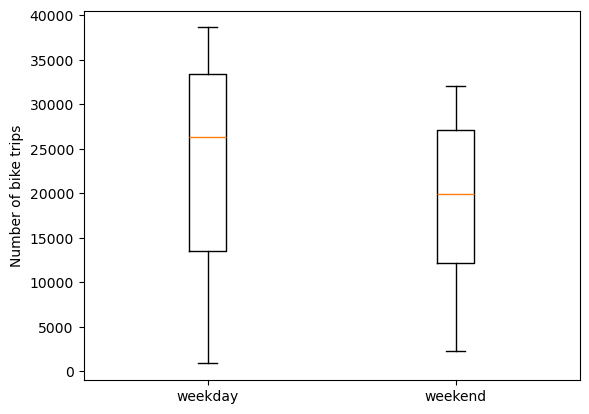

In [8]:

weekday_trips = []
weekend_trips = []


for i in range(len(weekday)):

    if weekday[i]:
        weekday_trips.append(num_trips[i])
    else:
        weekend_trips.append(num_trips[i])


# plot the results

plt.boxplot([weekday_trips, weekend_trips], labels = ["weekday", "weekend"]);
plt.ylabel("Number of bike trips");


### Warmup 0.2 - Functions

### 0.2.1: A function

Write a function named `string_and_length` which takes a string and returns a string containing the original string and its length.
For example, `string_and_length("ABC")` would return the string `"ABC3"`.



In [17]:
s = "This is my string"

def string_and_length(s):
    return s+str(len(s))

print(string_and_length(s))


This is my string17


### 0.2.2: Loop over the function

Write code that takes the string `s` below, strips the spaces, and produces a string that contains each word of the original string, followed by the length of that word.

For example, if `s = "This is my string"` then, `newstring = "This4is2my2string6"`

In [16]:
strlist = s.split(" ")

newstring = ""
for tmps in strlist:
    newstring += string_and_length(tmps)

print(newstring)

This4is2my2string6


## 1. Statistical inference

In statistical inference we use a smaller sample of data to make claims about a larger population of data. 

As an example, let's look at the [2020 election](https://www.cookpolitical.com/2020-national-popular-vote-tracker) between Donald Trump and Joe Biden, and let's focus on the results from the state of Georgia. After all the votes had been counted, the resuts showed that:

- Biden received 2,461,854 votes
- Trump received 2,473,633 votes

Since we have all the votes on election data, we can precisely calculate the population parameter of the proportion of votes that Biden received, which we will denote with the symbol $\pi_{Biden}$. 

Let's create names `num_trump_votes` and `num_biden_votes`, and calculate `true_prop_Biden` which is the value $\pi_{Biden}$. 

In [18]:
num_trump_votes = 2461854  # 2,461,854
num_biden_votes = 2473633  # 2,473,633


# calculate the proportion of people who voted for Biden
true_prop_Biden = num_biden_votes/(num_biden_votes + num_trump_votes)

true_prop_Biden

0.5011932966290864

The code below creates a DataFrame called `georgia_df` that captures these election results. Each row in the DataFrame represents a votes. The column `Voted Biden` is `True` if a voter voted for Biden and `False` if the voter voted for Trump. 

In [19]:
biden_votes = np.repeat(True, num_biden_votes)     # create 2,473,633 Trues for the Biden votes
trump_votes = np.repeat(False, num_trump_votes)    # create 2,461,854 Falses for the Trump votes
election_outcome = np.concatenate((biden_votes, trump_votes))  # put the votes together

georgia_df = pd.DataFrame({"Voted Biden": election_outcome})  # create a DataFrame with the data
georgia_df = georgia_df.sample(frac = 1)   # shuffle the order to make it more realistic

georgia_df.head()

,Voted Biden
547747,True
3823532,False
4291381,False
1109375,True
2414172,True


Now suppose we didn't know the actual value of $\pi_{Biden}$ and we wanted to estimate it based on a poll of 1,000 voters. We can simulate this by using the pandas `.sample(n = )` method.

Let's simulate sampling random voters

In [22]:
# sample 10 random points
georgia_df.sample(10)  

,Voted Biden
4439037,False
3374317,False
4502659,False
3538697,False
4187278,False
2163065,True
490312,True
4702890,False
1029282,True
2024083,True


In [23]:
# simulate proportions of voters that voted for Biden - i.e., p-hats

one_sample = georgia_df.sample(1000)

np.mean(one_sample['Voted Biden'])

np.float64(0.504)

### 1b. Creating a sampling distribution via taking random samples

Suppose 100 polls were conducted. How many of them would show that Biden would get the majority of the vote? 

Let's simulate this "sampling distribution" of statistics now... 


In [26]:
%%time

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    
    curr_sample = georgia_df.sample(sample_size)
    prop_biden = np.mean(curr_sample["Voted Biden"])
    sampling_dist.append(prop_biden)



CPU times: user 6.4 s, sys: 167 ms, total: 6.57 s
Wall time: 6.58 s


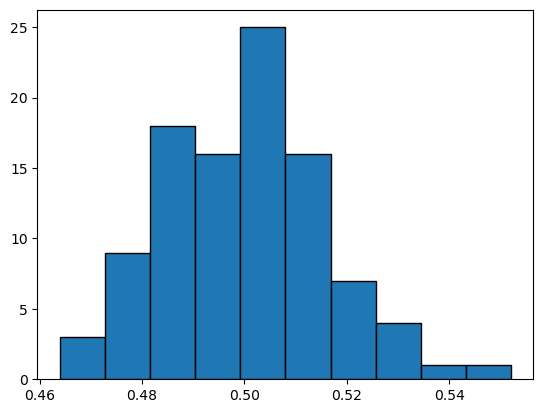

In [27]:
# plot a histogram of the sampling distribution

plt.hist(sampling_dist, edgecolor = "black");

### 1c. Creating a sampling distributions via coin flips (a faster way to simulate data)

Rather than simulating polling outcomes by pulling random samples from a DataFrame, let's simulate each vote by simulating randomly flipping a coin, where the probability of getting a "Head" (True value) is the probability of Biden getting a vote.

To do this we can use our `flip_coins(n, prob_heads, return_prop)` function we wrote in the previous lecture. 
 


In [36]:
# Function for teh previous lecture:
 
def flip_coins(n, prob, return_prop = False):
    
    rand_nums = np.random.rand(n)
    num_heads = np.sum(rand_nums <= prob)
    
    if return_prop:
        return num_heads/n
    else:
        return num_heads

In [37]:
%%time

# sampling distribution of many polls conducted

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    prop_biden = flip_coins(sample_size,  true_prop_Biden, return_prop = True)
    sampling_dist.append(prop_biden)

CPU times: user 1.79 ms, sys: 1.65 ms, total: 3.44 ms
Wall time: 2.57 ms


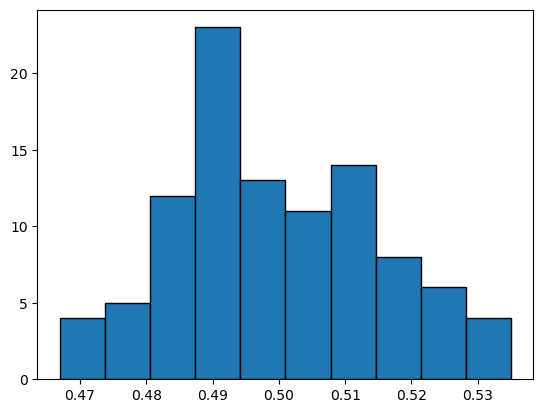

In [38]:
plt.hist(sampling_dist, edgecolor = "black", bins = 10);

## 2. Hypothesis tests

In hypothesis testing, we start with a claim about a population parameter (e.g., µ = 4.2, or π = 0.25).

This claim implies we should get a certain distribution of statistics, called "The null distribution". 

If our observed statistic is highly unlikely to come from the null distribution, we reject the claim. 

We can break down the process of running a hypothesis test into 5 steps. 

1. State the null and alternative hypothesis
2. Calculate the observed statistic of interest
3. Create the null distribution 
4. Calculate the p-value 
5. Make a decision

Let's run through these steps now!


#### Step 1: State the null and alternative hypothesis

$H_0: \pi = 0.5$

$H_A: \pi < 0.5$


#### Step 2: Calculate the observed statistic of interest


In [91]:
# load the data

movies = pd.read_csv("movies.csv")

movies.head(3)

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,...,director,released,actors,genre,awards,runtime,type,poster,imdb_votes,error
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,...,Steve McQueen,08 Nov 2013,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,movie,http://ia.media-imdb.com/images/M/MV5BMjExMTEz...,"143,446",NaN


In [92]:
# reduce data to a smaller number of columns: "title" and "binary"

movies_smaller = movies[["title", "binary"]]

In [93]:
# calculate the proportion of movies that pass the Bechdel test

booleans_passed = movies_smaller["binary"] == "PASS"

prop_passed = np.mean(booleans_passed)

prop_passed


0.447603121516165

#### Step 3: Create the null distribution 

We need to create a null distribution, which is the distribution of statistics we would expect to get if the null hypothesis is true. 

**Question**: about what percent of the movies would we expect to pass the Bechdel test if the null distribution was true? 

**Answer**: 50%

Let's create simulated data that is consistent with this!


In [95]:
# Let's generate one proportion consistent with the null hypothesis

# get the total number of movies in our dataset n
n = movies.shape[0]
print(n)

# proportion consistent with the null hypothesis
null_prop = .5


# one statistic consistent with null hypothesis
flip_coins(n,  null_prop, return_prop = True)



1794


0.5044593088071349

In [96]:
# Let's generate a null distribution 

null_dist = []

for i in range(10000):
    simulated_null_prop = flip_coins(n,  null_prop, return_prop = True)
    null_dist.append(simulated_null_prop)


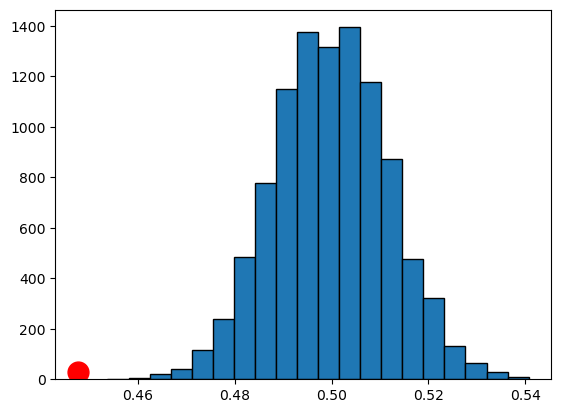

In [97]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 20) #, range = (.4, .6));
plt.plot(prop_passed, 30, '.', markersize = 30, color = "red");

#### Step 4: Calculate the p-value 

Calculate the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [98]:
# Calculate the p-value

# create a Boolean vector indicating whether each p-hat in the null distribution 
# was greater than the observed proportion that passed the Bechdel test
stats_more_extreme = np.array(null_dist) <= prop_passed

print(stats_more_extreme[0:5])

# calculate the p-value 
p_value = np.mean(stats_more_extreme)

p_value

[False False False False False]


0.0

#### Step 5: Make a decision

Since the p-value is very small (essentially zero) it is very unlikely that our statistic come from the null distribution. Thus we will reject the null hypothesis and conclude that less than 50% of movies pass the Bechdel test. 
